In [42]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("./excel/printer.xlsx")

In [13]:
cols = ['Unnamed: ' + str(i) for i in range(3,30)]
data = data.drop(cols, axis=1)
cols2=['스펙 목록', '가격']
data = data.drop(cols2, axis=1)

In [14]:
data['productid'] = [i for i in range(0,5901)]

In [53]:
test={'userid':[str(np.random.randint(1,31)) for i in range(1,5902)],
     'rating':[np.random.randint(1,6) for i in range(1,5902)],
     'productid':[np.random.randint(0,5902) for i in range(1,5902)]}
test = pd.DataFrame(test)
test = test.sort_values(by=['userid','productid'])
test = test.reset_index(drop=True)
print(test)
print(test.loc[0])

#test.to_excel('user_rating_productid.xlsx')





#ratings.to_excel('C:/Users/다해줘테크/Desktop/Python/ratings.xlsx', index = True)

     userid  rating  productid
0         1       1         28
1         1       4         53
2         1       2         75
3         1       1        160
4         1       5        199
...     ...     ...        ...
5896      9       1       5826
5897      9       2       5844
5898      9       3       5856
5899      9       3       5882
5900      9       5       5899

[5901 rows x 3 columns]
userid        1
rating        1
productid    28
Name: 0, dtype: object
1


In [28]:
merge_data = pd.merge(test, data, on = 'productid')

In [158]:
merge_data

,user,rating,productid,상품명
0,user27,2,3664,Kyocera TASKalfa3010i
1,user13,4,4763,삼성전자 MultiXpress SL-X4255LX
2,user15,3,5792,신도리코 N500
3,user25,1,4222,삼성전자 MultiXpress SL-K3250NR
4,user9,5,4222,삼성전자 MultiXpress SL-K3250NR
...,...,...,...,...
5895,user1,1,5888,코니카미놀타 bizhub 362
5896,user18,0,469,Canon IR C3125
5897,user23,4,2264,Epson 완성형 가정용 정품 무한 L3156
5898,user11,1,3128,HP 오피스젯 무선 6500 Series E709s 무한공급기


In [159]:
rating = merge_data.pivot_table('rating', index='user', columns='상품명').fillna(0)
rating.head()

상품명,ApeosPort 3560,ApeosPort C2560,ApeosPort C3060,ApeosPort-IV C2270,ApeosPort-IV C2270CPF,ApeosPort-IV C2270CPS,ApeosPort-IV C4430,ApeosPort-IV C4470,ApeosPort-IV C4470 CP,ApeosPort-IV C4470 CPF,...,코니카미놀타 C036DN,코니카미놀타 bizhub 164,코니카미놀타 bizhub 211,코니카미놀타 bizhub 215,코니카미놀타 bizhub 362,코니카미놀타 bizhub 363,코니카미놀타 bizhub 423,코니카미놀타 bizhub C200,코니카미놀타 bizhub C220,코니카미놀타 bizhub C360
user,,,,,,,,,,,,,,,,,,,,,
user0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
user10,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [160]:
 #matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = rating.values

# user_ratings_mean은 사용자의 평균 평점 
user_ratings_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)

In [161]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
matrix.shape

(30, 1302)

In [163]:
user_ratings_mean.shape

(30,)

In [164]:
matrix_user_mean.shape

(30, 1302)

In [165]:
pd.DataFrame(matrix_user_mean, columns = rating.columns).head()

상품명,ApeosPort 3560,ApeosPort C2560,ApeosPort C3060,ApeosPort-IV C2270,ApeosPort-IV C2270CPF,ApeosPort-IV C2270CPS,ApeosPort-IV C4430,ApeosPort-IV C4470,ApeosPort-IV C4470 CP,ApeosPort-IV C4470 CPF,...,코니카미놀타 C036DN,코니카미놀타 bizhub 164,코니카미놀타 bizhub 211,코니카미놀타 bizhub 215,코니카미놀타 bizhub 362,코니카미놀타 bizhub 363,코니카미놀타 bizhub 423,코니카미놀타 bizhub C200,코니카미놀타 bizhub C220,코니카미놀타 bizhub C360
0,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,...,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884,-0.241884
1,-0.245142,-0.245142,-0.245142,-0.245142,-0.245142,-0.245142,-0.245142,-0.245142,-0.245142,-0.245142,...,-0.245142,-0.245142,-0.245142,-0.245142,0.754858,-0.245142,-0.245142,-0.245142,-0.245142,-0.245142
2,2.715835,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,4.715835,-0.284165,...,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165,-0.284165
3,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,...,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305,-0.243305
4,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,...,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,-0.273208,3.726792


In [166]:
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_user_mean, k = 12)

In [167]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(30, 12)
(12,)
(12, 1302)


In [168]:
sigma = np.diag(sigma)

In [169]:
sigma[0]

array([28.81216398,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [170]:
sigma[1]

array([ 0.        , 29.03553323,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [171]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [172]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = rating.columns)
df_svd_preds.head()

상품명,ApeosPort 3560,ApeosPort C2560,ApeosPort C3060,ApeosPort-IV C2270,ApeosPort-IV C2270CPF,ApeosPort-IV C2270CPS,ApeosPort-IV C4430,ApeosPort-IV C4470,ApeosPort-IV C4470 CP,ApeosPort-IV C4470 CPF,...,코니카미놀타 C036DN,코니카미놀타 bizhub 164,코니카미놀타 bizhub 211,코니카미놀타 bizhub 215,코니카미놀타 bizhub 362,코니카미놀타 bizhub 363,코니카미놀타 bizhub 423,코니카미놀타 bizhub C200,코니카미놀타 bizhub C220,코니카미놀타 bizhub C360
0,-0.130609,-0.071996,-0.103522,-0.361168,0.134467,0.007515,0.007515,0.102929,-0.222692,0.025204,...,-0.234472,0.025088,0.242647,0.175160,0.167645,0.306855,0.175160,-0.591611,0.007515,0.207659
1,0.230667,-0.022495,0.429130,0.067887,0.254392,-0.010292,-0.010292,0.175614,0.391306,0.105614,...,0.210085,0.295517,-0.445446,0.020957,0.224639,-0.436925,0.020957,0.162971,-0.010292,-0.062295
2,2.586430,0.050507,-0.150891,0.098314,0.117500,0.013560,0.013560,0.291493,4.301676,0.133942,...,0.384295,0.181188,0.355479,0.023888,0.093880,0.508514,0.023888,0.294335,0.013560,-0.241860
3,-0.250712,0.174044,0.054247,0.121489,0.173652,0.021551,0.021551,-0.174498,-0.432221,0.184137,...,0.491375,0.602742,-0.302840,0.208946,0.033926,-0.385799,0.208946,0.216964,0.021551,-0.197602
4,-0.192544,-0.007409,0.263731,0.271286,-0.509586,-0.000979,-0.000979,1.202660,-0.320254,0.283432,...,0.436145,1.163487,0.165953,-0.009852,-0.013979,0.262490,-0.009852,0.094161,-0.000979,1.607636


In [173]:
df_svd_preds.shape

(30, 1302)

In [174]:
def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=5):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = ori_ratings_df[ori_ratings_df.user == 'user'+str(user_id)]
    
    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다. 
    user_history = user_data.merge(ori_movies_df, on = 'productid').sort_values(['rating'], ascending=False)
    
    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    recommendations = ori_movies_df[~ori_movies_df['productid'].isin(user_history['productid'])]
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'productid')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      

    return user_history, recommendations

In [148]:
already_rated, predictions = recommend_movies(df_svd_preds, 29, data, test, 10)

KeyError: 'productid'

In [88]:
import random
datata = pd.read_excel("./excel/printer_data1.xlsx")
datata.head()

,Unnamed: 0,상품명,가격,keyword,productid,업종,근무자수
0,0,ApeosPort 2560,2125000,흑백 디지털 복합기 잉크젯 포토프린터 컬러 출력 복사 스캔 팩스 인쇄 ...,1,5,630
1,1,ApeosPort 3060,2200000,흑백 디지털 복합기 잉크젯 포토프린터 컬러 출력 복사 스캔 팩스 인쇄 ...,2,9,730
2,2,ApeosPort 3560,2528000,"흑백 디지털 복합기 잉크젯 컬러 출력 복사 스캔 인쇄 해상도: 4,800d...",3,6,920
3,3,ApeosPort C2060,2600000,컬러 디지털 복합기 인쇄 복사 스캔 컬러 속도: 23ppm 흑백 속도: 2...,4,7,530
4,4,ApeosPort C2560,2778170,컬러 디지털 복합기 인쇄 복사 스캔 팩스 컬러 속도: 23ppm 흑백 속...,5,8,80


In [89]:
datata = pd.DataFrame(datata)
datata['기본 급지용량'] = -1
aa = '기본 급지용량:'


for i in range(0,5901):

    if( aa in datata.loc[i]['keyword']):
        start = datata.loc[i]['keyword'].find(aa)
        #print(datata.loc[i]['기본 급지용량'])
        temp = datata.loc[i]['keyword'][start+9:start+15]
        temp = temp.split('매')[0]
        temp = temp.replace(',','')
        datata.at[i,'기본 급지용량'] = temp
        #print(datata.loc[i]['기본 급지용량'])
        
    elif( bb in datata.loc[i]['keyword']):
        start = datata.loc[i]['keyword'].find(bb)
        space1 = datata.loc[i]['keyword'].find(' ',start+7)
        space2 = datata.loc[i]['keyword'].find(' ',start+8)
        temp = datata.loc[i]['keyword'][space1+1:space2]
        temp = temp.split('매')[0]
        temp = temp.split('~')[0]
        datata.at[i,'기본 급지용량'] = temp
    
    else:
        datata.at[i,'기본 급지용량'] = random.randrange(20,140) * 10

        
datata['내구성'] = 0.0
datata['근무자수'] = 0

for i in range(0,5901):
    datata.at[i,'내구성'] = random.randrange(1,5) 
    datata.at[i,'근무자수'] = random.randrange(1,101) 

datata.head()

datata.head()
datata.to_excel('./printer_data_new.xlsx', index = False)

In [71]:
datata = pd.DataFrame(datata)
datata['기본 급지용량'] = str(-1)
datata['용지함 용량'] = str(-1)
aa = '기본 급지용량:'
bb = '용지함 용량:'



#print(datata.loc[2]['기본 급지용량'])
#datata.at[2,'기본 급지용량'] = 99
#print(datata.loc[2]['기본 급지용량'])


for i in range(0,5901):

    if( aa in datata.loc[i]['keyword']):
        start = datata.loc[i]['keyword'].find(aa)
        #print(datata.loc[i]['기본 급지용량'])
        temp = datata.loc[i]['keyword'][start+9:start+15]
        temp = temp.split('매')[0]
        datata.at[i,'기본 급지용량'] = temp
        #print(datata.loc[i]['기본 급지용량'])
        
    if( bb in datata.loc[i]['keyword']):
        start = datata.loc[i]['keyword'].find(bb)
        space1 = datata.loc[i]['keyword'].find(' ',start+7)
        space2 = datata.loc[i]['keyword'].find(' ',start+8)
        temp = datata.loc[i]['keyword'][space1+1:space2]
        temp = temp.split('매')[0]
        datata.at[i,'용지함 용량'] = temp

datata.head()
datata.to_excel('./printer_data_new1.xlsx', index = False)

In [91]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data_1 = pd.read_excel("test_data.xlsx")
data_2 = pd.read_excel("printer_data_new.xlsx")

In [107]:
#user_printer_data = pd.merge(data_1,data_2, on='productid')
user_printer_rating = data_1.pivot(index='userid' , columns='productid' ,values='rating').fillna(0)
user_printer_rating.head()

matrix = user_printer_rating.values

# user_ratings_mean은 사용자의 평균 평점 
user_rating_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_rating_mean.reshape(-1, 1)

print(matrix)
print(matrix_user_mean)
print(matrix.shape)
print(user_rating_mean.shape)
print(matrix_user_mean.shape)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.30631917 -0.30631917 -0.30631917 ... -0.30631917 -0.30631917
  -0.30631917]
 [-0.26615494 -0.26615494 -0.26615494 ... -0.26615494 -0.26615494
  -0.26615494]
 [ 3.7093895  -0.2906105   3.7093895  ... -0.2906105  -0.2906105
  -0.2906105 ]
 ...
 [-0.31470903 -0.31470903 -0.31470903 ... -0.31470903 -0.31470903
  -0.31470903]
 [-0.30810425 -0.30810425 -0.30810425 ... -0.30810425 -0.30810425
  -0.30810425]
 [-0.30274902 -0.30274902 -0.30274902 ... -0.30274902 -0.30274902
  -0.30274902]]
(30, 5602)
(30,)
(30, 5602)


In [102]:
#pd.DataFrame(matrix_user_mean, columns= user_printer_rating.columns).head()

U, sigma, Vt = svds(matrix_user_mean, k = 12)

print(U.shape)
print(sigma.shape)
print(Vt.shape)


sigma = np.diag(sigma)
print(sigma.shape)
print(sigma[0])
print(sigma[1])



#원본 user-printer 평점 행렬이 있었음
#이를 user의 평균 점수를 빼서 matrix_user_mean 이라는 행렬로 만듬
#2번의 값을 SVD를 적용해 U, Sigma, Vt 행렬을 구했음
#Sigma 행렬은 현재 0이 포함이 되지 않은 값으로만 구성되어 있음. 이를 대칭행렬로 변환


# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_rating_mean.reshape(-1, 1)
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = user_printer_rating.columns)
df_svd_preds.head()


(30, 12)
(12,)
(12, 5602)
(12, 12)
[76.77151451  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
[ 0.        76.8078315  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.       ]


productid,1,2,3,4,5,6,7,8,9,10,...,5892,5893,5894,5895,5896,5897,5898,5899,5900,5901
0,-0.076638,-0.449460,-0.364301,-0.011846,-0.622430,0.259490,-0.236961,0.381995,-0.847976,0.088390,...,0.112474,0.413365,-0.324639,0.059901,0.249491,0.518346,0.280390,0.172098,1.337524,0.289549
1,0.065347,0.242463,0.212056,0.076133,0.234047,-0.018368,0.396079,0.320294,0.121494,0.092450,...,0.205161,0.609871,0.145695,0.242047,0.293130,-0.075054,0.327137,0.288056,0.254927,0.385086
2,1.630113,-0.117849,1.921097,-0.271549,1.509666,0.300246,0.380402,0.246645,2.134836,0.459813,...,0.221104,0.240796,0.586952,0.426126,0.357524,1.195855,0.636059,0.491661,-0.257623,-0.408715
3,-0.827456,-0.578931,-1.504709,1.267682,-0.929315,0.013971,0.659885,0.552590,-0.675126,0.679564,...,0.051540,-0.573726,-0.108774,0.237935,0.213637,-0.035690,0.115050,0.205537,-0.154256,0.761913
4,0.301239,-0.251348,-0.415977,0.519615,0.005244,0.290142,0.025864,0.367106,-0.232885,0.180937,...,0.285978,0.316646,0.231322,0.184084,0.310506,0.591950,0.065506,0.239208,0.027612,0.693177


In [103]:
print(df_svd_preds.shape)


def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=3):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = ori_ratings_df[ori_ratings_df.userid == user_id]
    
    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다. 
    user_history = user_data.merge(ori_movies_df, on = 'productid').sort_values(['rating'], ascending=False)
    
    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    recommendations = ori_movies_df[~ori_movies_df['productid'].isin(user_history['productid'])]
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'productid')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      

    return user_history, recommendations


already_rated, predictions = recommend_movies(df_svd_preds, 25, data_2, data_1, 50)



(30, 5602)


In [106]:
#already_rated.head(10)
predictions

,상품명,가격,keyword,productid,업종,근무자수,기본 급지용량,내구성,Predictions
3265,LG전자 LIP2610CW,0,"복합기 잉크젯 포토프린터 컬러 출력 복사 스캔 인쇄 해상도: 4,800d...",3859,병원,64,820,4,2.237130
4101,삼성전자 MultiXpress SL-X4305LX,2759100,컬러 디지털 복합기 잉크젯 컬러 출력 복사 스캔 컬러 속도(ISO): 6....,4841,서비스,89,350,3,2.031707
1849,Epson WorkForce Pro WF-C8690,1867000,"컬러 디지털 복합기 잉크젯 컬러 출력 복사 스캔 인쇄 해상도: 5,760d...",2180,행정,3,740,1,1.982358
3728,삼성전자 MultiXpress SL-K7600GX,6699940,흑백 디지털 복합기 잉크젯 컬러 출력 복사 스캔 컬러 속도: 16ppm ...,4397,사무,24,100,1,1.969587
2670,HP 오피스젯 엔터프라이즈 X585dn 다기능 프린터,2576000,"복합기 잉크젯 컬러 출력 복사 스캔 인쇄 해상도: 4,800dpi 잉크 ...",3140,은행,82,1010,1,1.899893
4365,삼성전자 SL-J5560FW,970000,복합기 레이저젯 인쇄 복사 스캔 컬러 속도: 25ppm 흑백 속도: 25...,5148,사무,29,1050,4,1.852139
2002,Epson 완성형 정품 무한 L6190,329000,"복합기 잉크젯 컬러 출력 복사 스캔 인쇄 해상도: 4,800dpi 잉크 ...",2368,교육,89,1210,1,1.852100
3590,삼성전자 MultiXpress SL-K3250NR,1151410,흑백 디지털 복합기 레이저젯 인쇄 복사 스캔 팩스 컬러 속도: 25ppm...,4232,서비스,17,1200,3,1.824836
3766,삼성전자 MultiXpress SL-M4370LX,1482650,흑백 디지털 복합기 잉크젯 컬러 출력 복사 스캔 컬러 속도(ISO): 6....,4442,교육,38,350,3,1.720694
1713,Epson Stylus Photo TX700W 무한공급기,0,"복합기 잉크젯 컬러 출력 복사 스캔 팩스 인쇄 해상도: 4,800dpi ...",2024,사무,44,310,2,1.690754


In [124]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [125]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        
        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Create copy of row of P since we need to update it but use older values for update on Q
            P_i = self.P[i, :][:]
            
            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * P_i - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [152]:


data_1 = pd.read_excel("test_data.xlsx")
data_1_list = data_1.values.tolist()
user_printer_rating = data_1.pivot(index='userid' , columns='productid' ,values='rating').fillna(0)
user_printer_rating_list = user_printer_rating.values.tolist()

import numpy

R = numpy.array(user_printer_rating_list)

# R = np.array([
#     [5, 3, 0, 1,2,3,5,4,5,4,6,3,5,5,6,7,7,5,6,6,5,4,3],
#     [4, 0, 0, 1,3,4,5,2,5,4,6,3,5,5,6,7,7,5,6,6,5,4,3],
#     [1, 1, 0, 5,4,3,2,5,5,4,6,3,5,5,6,7,7,5,6,6,5,4,3],
#     [1, 0, 0, 4,2,4,5,4,5,4,6,3,5,5,6,7,7,5,6,6,5,4,3],
#     [0, 1, 5, 4,3,2,3,5,5,4,6,3,5,5,6,7,7,5,6,6,5,4,3],
 
# ])




mf = MF(R, K=2, alpha=0.01, beta=0.01, iterations=200)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()
print("Global bias:")
print(mf.b)
print()
print("User bias:")
print(mf.b_u)
print()
print("Item bias:")
print(mf.b_i)

Iteration: 10 ; error = 170.1054
Iteration: 20 ; error = 160.1701
Iteration: 30 ; error = 149.6223
Iteration: 40 ; error = 136.9946
Iteration: 50 ; error = 124.9509
Iteration: 60 ; error = 115.4293
Iteration: 70 ; error = 108.7415
Iteration: 80 ; error = 104.2341
Iteration: 90 ; error = 100.9785
Iteration: 100 ; error = 98.5344
Iteration: 110 ; error = 96.8107
Iteration: 120 ; error = 95.2294
Iteration: 130 ; error = 94.1286
Iteration: 140 ; error = 92.9749
Iteration: 150 ; error = 92.2083
Iteration: 160 ; error = 91.4600
Iteration: 170 ; error = 90.8197
Iteration: 180 ; error = 90.1935
Iteration: 190 ; error = 89.6873
Iteration: 200 ; error = 89.3557
Iteration: 210 ; error = 88.7761
Iteration: 220 ; error = 88.4201
Iteration: 230 ; error = 88.1879
Iteration: 240 ; error = 87.8115
Iteration: 250 ; error = 87.5488
Iteration: 260 ; error = 87.1889
Iteration: 270 ; error = 86.9224
Iteration: 280 ; error = 86.7066
Iteration: 290 ; error = 86.5339
Iteration: 300 ; error = 86.2080
Iteration:

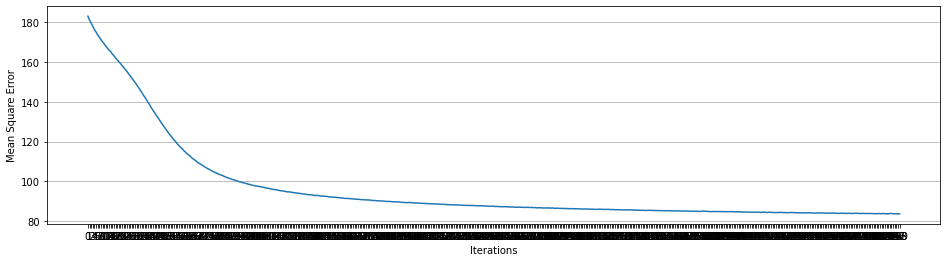

In [153]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")

plt.grid(axis="y")

In [82]:
import re
datata = pd.read_excel("printer_data_new.xlsx")
datata.head()

,상품명,가격,keyword,productid,업종,근무자수,기본 급지용량,내구성
0,ApeosPort 2560,2125000,흑백 디지털 복합기 잉크젯 포토프린터 컬러 출력 복사 스캔 팩스 인쇄 ...,1,법,87,300,2
1,ApeosPort 3060,2200000,흑백 디지털 복합기 잉크젯 포토프린터 컬러 출력 복사 스캔 팩스 인쇄 ...,2,기타,23,1290,3
2,ApeosPort 3560,2528000,"흑백 디지털 복합기 잉크젯 컬러 출력 복사 스캔 인쇄 해상도: 4,800d...",3,교육,68,530,2
3,ApeosPort C2060,2600000,컬러 디지털 복합기 인쇄 복사 스캔 컬러 속도: 23ppm 흑백 속도: 2...,4,행정,25,1200,3
4,ApeosPort C2560,2778170,컬러 디지털 복합기 인쇄 복사 스캔 팩스 컬러 속도: 23ppm 흑백 속...,5,행정,96,1350,2


In [89]:
datata = pd.DataFrame(datata)

datata['인쇄 해상도'] = int(0)
cc = '인쇄 해상도: '
datata['인쇄 속도'] = int(0)
dd = '흑백 속도: '
ee = '컬러 속도: '

for i in range(0,5901):

    if( cc in datata.loc[i]['keyword']):
        start = datata.loc[i]['keyword'].find(cc)
        temp = datata.loc[i]['keyword'][start+8:start+13]
        temp = temp.split('dpi')[0]
        temp = temp.split(' x')[0]
        temp = temp.replace(',','')
        temp = re.findall('\d+',temp)
        temp[0] = int(temp[0])
        datata.at[i,'인쇄 해상도'] = temp[0]
    
    temp_arr=[]
    
    if( dd in datata.loc[i]['keyword']):
        start = datata.loc[i]['keyword'].find(dd)
        temp = datata.loc[i]['keyword'][start+4:start+10]
        temp = re.findall('\d+',temp)

        if(temp):
            temp[0] = int(temp[0])
            temp_arr.append(temp[0])
    if( ee in datata.loc[i]['keyword']):
        start = datata.loc[i]['keyword'].find(ee)
        temp = datata.loc[i]['keyword'][start+4:start+10]
        temp = re.findall('\d+',temp)

        if(temp):
            temp[0] = int(temp[0])
            temp_arr.append(temp[0])

        avg = sum(temp_arr,0)/len(temp_arr)
        datata.at[i,'인쇄 속도'] = int(avg)

datata.head()
datata.to_excel('./printer_data_new2.xlsx', index = False)

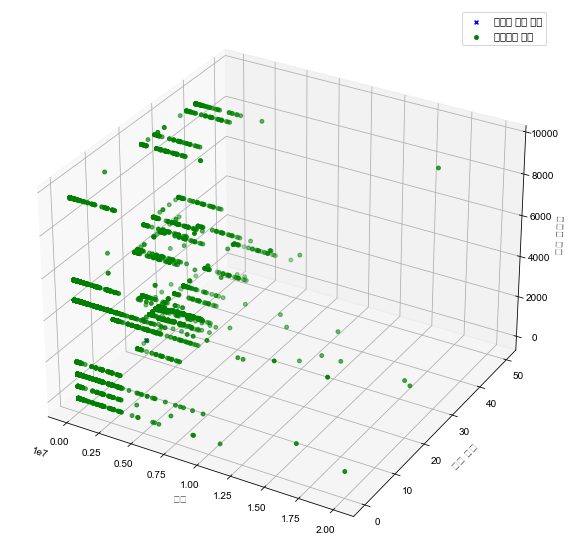

In [43]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
# 3차원 그래프를 그리기 위해서 from mpl_toolkits.mplot3d import Axes3D를 추가해줍니다.
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

datata = pd.read_excel("printer_data_new2.xlsx")

n = 100

cmin, cmax = 0, 2

x=[]
y=[]
z=[]
name=[]

num = 5901

for i in range(0,num):
    x.append(datata.loc[i]['가격'])
    y.append(datata.loc[i]['인쇄 속도'])
    z.append(datata.loc[i]['인쇄 해상도'])
    name.append(datata.loc[i]['상품명'])
x1 = 200000   
y1 = 20
z1 =200


plt.rcParams["figure.figsize"] = (10, 10)

fig = plt.figure()



ax = fig.add_subplot(111, projection='3d')

#사용자의 값 그래프에 표시
ax.scatter(x1,y1,z1,  marker='x', s=15, c='blue')
#보유제품의 값 그래프에 표시
ax.scatter(x,y,z, marker='o', s=15, c='green')

plt.rcParams["font.family"] = 'NanumGothic'

plt.legend(("사용자 요구 스펙","사무기기 스펙"),loc="best")

ax.set_xlabel('가격')
ax.set_ylabel('인쇄 속도')
ax.set_zlabel('인쇄 해상도')

# ax.plot(x1,y1,z1,"x",label="x+y")
# ax.plot(x,y,z,"o",label="3*x-y")

plt.show()

In [44]:
#점과 점사이의 거리를 구하는 공식
def distance(x1, y1, z1, x2, y2, z2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2) + math.pow(z1 - z2, 2))
    return result

In [46]:
result={}

temp={}
for i in range(0,num):
#     result[name[i]] = int(distance(x[i], y[i], z[i], x1, y1, z1))

    result[name[i]]={
                '거리':int(distance(x[i], y[i], z[i], x1, y1, z1)),
                '가격':datata.loc[i]['가격'],
                '인쇄 속도':datata.loc[i]['인쇄 속도'],
                '인쇄 해상도':datata.loc[i]['인쇄 해상도']
               }

#     result={
#                 '상품명':name[i],
#                 '거리':int(distance(x[i], y[i], z[i], x1, y1, z1)),
#                 '가격':datata.loc[i]['가격'],
#                 '인쇄 속도':datata.loc[i]['인쇄 속도'],
#                 '인쇄 해상도':datata.loc[i]['인쇄 해상도']
#     }

    
print('사용자 요구사항 ')
print('가격: ',x1,'  인쇄 속도: ',y1, '  인쇄 해상도: ',z1)
print('와의 거리\n')



# result = sorted(result.items(), key=lambda x:x['거리'])
#print(result)
df = pd.DataFrame(result)
df = df.transpose()
df = df.sort_values(by='거리')
df
# df
# for i in range(0,5901):
#     print(name[i] ,' ', result[i])

사용자 요구사항 
가격:  200000   인쇄 속도:  20   인쇄 해상도:  200
와의 거리



,거리,가격,인쇄 속도,인쇄 해상도
HP 레이저젯 프로 MFP M130fn,1414,199000,0,1200
삼성전자 SL-M2077F,2147,201900,22,1200
삼성전자 SL-M2670N,3668,203530,25,1200
Epson 정품 무한 L385,4600,199990,0,4800
Brother MFC-L2700D,4707,199000,0,4800
...,...,...,...,...
Epson WorkForce Enterprise WF-C21000,18099942,18299940,38,9600
Epson WorkForce Enterprise WF-C20590,18511290,18711290,0,4800
신도리코 D722,18700000,18900000,25,1200
Epson WorkForce Enterprise WF-C20750,19300000,19500000,24,1200


In [47]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [7]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]